# DS 3000 - Assignment 7

**Student Name**: Savir Khanna

**Date**: 10/18


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(0 pts) Load the data directly from the URLLinks to an external site.. Ensure that you inspect the data, so that you know how to identify the necessary columns.
Note: this is an alternate link that can be used to load the data: https://drive.google.com/uc?id=1mEewmIvXA57H3upxkqx9vkZfKch9oDsLLinks to an external site.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [155]:
df = pd.read_csv("https://drive.google.com/uc?id=1mEewmIvXA57H3upxkqx9vkZfKch9oDsL")
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662,NaN


## Question 2: 
(10 pts) Extract the meat consumption data for any three countries of your choice and evaluate the patterns and trends in their meat consumption. You can explore any (2) types of meat (from the chosen countries), and you should only select one unit of measurement**. Ensure that you visualize the data and explain your findings.

In [156]:
df["LOCATION"].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'ARG',
       'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN',
       'ISR', 'KAZ', 'MYS', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS',
       'SAU', 'ZAF', 'THA', 'UKR', 'VNM', 'WLD', 'OECD', 'BRICS', 'NOR',
       'CHE', 'GBR'], dtype=object)

In [251]:
# Let's choose Austrailia, Mexico, and Kazakhstan and Beef / pig
new_df = df[(df["LOCATION"] == 'AUS') | (df["LOCATION"] == 'MEX') | (df["LOCATION"] == 'KAZ')]
new_df = new_df[(new_df["SUBJECT"] == 'BEEF') | (new_df["SUBJECT"] == 'PIG')]
new_df = new_df[new_df["MEASURE"] == "THND_TONNE"]

new_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
6280,KAZ,MEATCONSUMP,BEEF,THND_TONNE,A,1990,710.000,NaN
6281,KAZ,MEATCONSUMP,BEEF,THND_TONNE,A,1991,724.000,NaN
6282,KAZ,MEATCONSUMP,BEEF,THND_TONNE,A,1992,593.206,NaN
6283,KAZ,MEATCONSUMP,BEEF,THND_TONNE,A,1993,651.306,NaN
6284,KAZ,MEATCONSUMP,BEEF,THND_TONNE,A,1994,614.695,NaN
...,...,...,...,...,...,...,...,...
11355,MEX,MEATCONSUMP,PIG,THND_TONNE,A,2025,2543.809,NaN
11356,MEX,MEATCONSUMP,PIG,THND_TONNE,A,2026,2574.550,NaN
11357,MEX,MEATCONSUMP,PIG,THND_TONNE,A,2027,2605.359,NaN
11358,MEX,MEATCONSUMP,PIG,THND_TONNE,A,2028,2635.276,NaN


In [252]:
# Creating separate dataframes for each meat type (graphing purposes)
beef_df = new_df[new_df["SUBJECT"] == 'BEEF']
pig_df = new_df[new_df["SUBJECT"] == 'PIG']

In [254]:
# Grouping by country & sum consumption
beef_by_country = beef_df.groupby('LOCATION')['Value'].sum().reset_index()
pig_by_country = pig_df.groupby('LOCATION')['Value'].sum().reset_index()

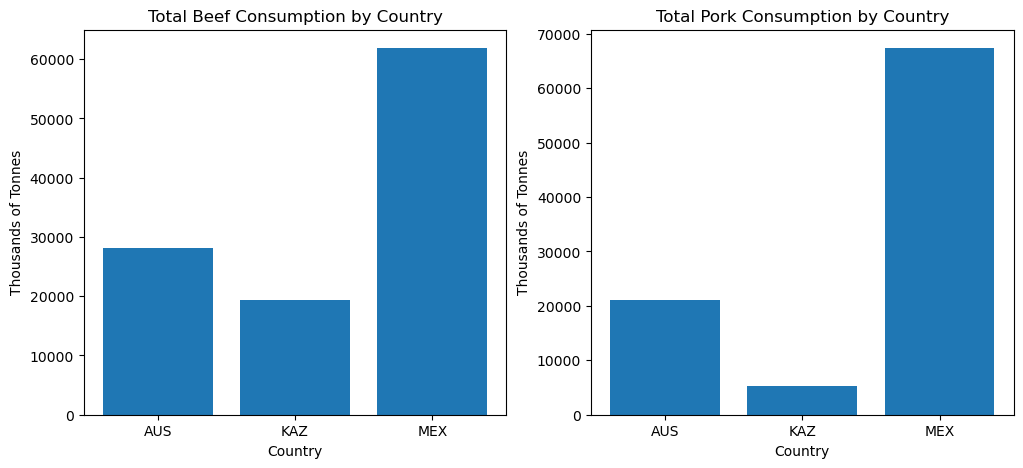

In [255]:
#Side-by-side bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(beef_by_country['LOCATION'], beef_by_country['Value'])
ax1.set_title('Total Beef Consumption by Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Thousands of Tonnes')

ax2.bar(pig_by_country['LOCATION'], pig_by_country['Value'])
ax2.set_title('Total Pork Consumption by Country')
ax2.set_xlabel('Country')
ax2.set_ylabel('Thousands of Tonnes')

plt.show()

The beef and pork consumption by country are proportional I would say, with Mexico having significantly more than Kazakhstan and Austrailia. Kazakhstan specifically has much less than the other two, and overall more Beef is consumed than pork, only Mexico eats more pork.

## Question 3: 
(5 pts) Extract the poultry consumption data, from 1994 to 2014 (inclusive), for Mexico, that is measured in thousand tonnes of carcass weight**. Note: the filtered dataframe should only contain the time and the values.

In [160]:
# Extracted poultry consumption data
poultry_df = df[(df["SUBJECT"] == "POULTRY") & (df["LOCATION"] == "MEX") & (df["MEASURE"] == "THND_TONNE")]
poultry_df = poultry_df[(poultry_df["TIME"] >= 1994) & (poultry_df["TIME"] <= 2014)]
poultry_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
9644,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,1994,1369.909,NaN
9645,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,1995,1515.516,NaN
9646,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,1996,1505.322,NaN
9647,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,1997,1750.495,NaN
9648,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,1998,1931.271,NaN
9649,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,1999,2080.252,NaN
9650,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2000,2229.966,NaN
9651,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2001,2351.655,NaN
9652,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2002,2516.807,NaN
9653,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2003,2686.007,NaN


In [256]:
poultry_df = poultry_df[["Value", "TIME"]]
poultry_df

,Value,TIME
9644,1369.909,1994
9645,1515.516,1995
9646,1505.322,1996
9647,1750.495,1997
9648,1931.271,1998
9649,2080.252,1999
9650,2229.966,2000
9651,2351.655,2001
9652,2516.807,2002
9653,2686.007,2003


## Question 4: 
(5 pts) Summarize the extracted data using descriptive statistics. Explain the statistical summary.
NOTE: this question requires that you evaluate and explain the distribution. Do not simply display the descriptive statistics or say "the maximum values are higher than the average".

In [257]:
# Getting the statistics of the df and rounding them
round(poultry_df["Value"].describe(), 2)

count      21.00
mean     2698.37
std       783.94
min      1369.91
25%      2080.25
50%      2783.34
75%      3314.59
max      3801.83
Name: Value, dtype: float64

In [163]:
max(poultry_df["Value"]) - min(poultry_df["Value"])

2431.924

In thousands of tons, Mexico has consumed an average of 2698.37 of chicken over the two decades from 1994-2014. The total range of the data would be the the max substracted by the min, being 2431.924. From the range and the quartile seperations, we can see its a relatively normal distribution. In general, the quartile ranges are seperated by ~700 with the max being ~500 above the 75% range and min being ~700 below the 25%. The standard deviation of 783.94 supports this hypothesis, and we can conclude that the country of Mexico had a normal distribution with no skew or outliers for their poultry consumption.

## Question 5: 
(10 pts) Visualize the extracted data, using a line chart, and comment on the trend.

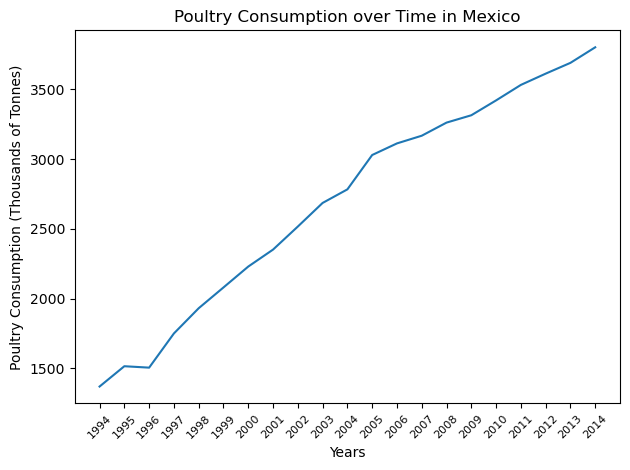

In [164]:
# Casting ints to strings so the xlabel is accurate
str_yrs = [str(year) for year in poultry_df["TIME"]]

plt.plot(str_yrs, poultry_df["Value"])

# plotting and labeling
plt.ylabel("Poultry Consumption (Thousands of Tonnes)")
plt.xlabel("Years")
plt.title("Poultry Consumption over Time in Mexico")

# Rotate and make smaller
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

plt.show()

The line chart for Poultry Consumption over Time in Mexico shows a steady and near linear increase of consumption over time. From around 1388 in 1994 to 3801 in 2014, that's over a 250% increase in chicken consumption, in the thousands of tons. Part of this can be attributed to Mexico's increased population over time, from around 89,259,205 in 1994 to 119,784,262 in 2014, a substantial increase of 40 million people (https://www.macrotrends.net/datasets/global-metrics/countries/mex/mexico/population). Another factor that potentially led to the substantial increase in poultry consumption would be the overall economic growth of the world. Rich people naturally eat more protein and meat, and with the average Mexican's salary and family size increasing over time, the big increase makes sense.

## Question 6: 
(15 pts) Predict poultry consumption from 2015 to 2020 using a simple linear regression model.
Ensure that you visualize the original dataset along with the model's predictions.
Evaluate the model's predictions against the actual consumption data from 2015 to 2020 and discuss its performance.

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [216]:
# Same data as q3 but 2015-2020
filtered_poultry_df = df[(df["TIME"] >= 2015) & (df["TIME"] <= 2020) & (df["SUBJECT"] == 'POULTRY') & (df["LOCATION"] == 'MEX') & (df["MEASURE"] == 'THND_TONNE')]
filtered_poultry_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
9665,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2015,3928.083,NaN
9666,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2016,4073.135,NaN
9667,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2017,4223.313,NaN
9668,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2018,4316.464,NaN
9669,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2019,4426.506,NaN
9670,MEX,MEATCONSUMP,POULTRY,THND_TONNE,A,2020,4481.279,NaN


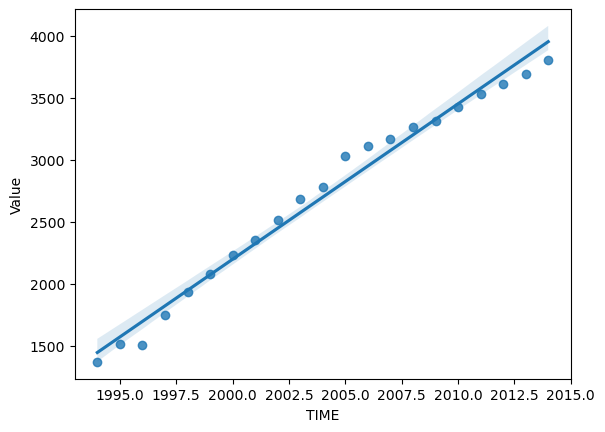

In [261]:
# as per class video
sns.regplot(data=poultry_df, x="TIME", y="Value")
plt.show()
X = np.array(poultry_df["TIME"]).reshape(-1,1)
y = np.array(poultry_df["Value"]).reshape(-1,1)

lr = LinearRegression(fit_intercept=True)
lr = lr.fit(X, y)

In [221]:
# func for calculating the y_predictions
def y_predictions():
    # y_pred = mx + b
    y_pred = []
    for year in filtered_poultry_df["TIME"]:
        y_pred.append((year * lr.coef_[0,0]) + lr.intercept_[0]) 
    return y_pred

y_pred = y_predictions()
y_pred

[np.float64(4076.206804761896),
 np.float64(4201.46441904761),
 np.float64(4326.722033333324),
 np.float64(4451.979647619039),
 np.float64(4577.237261904753),
 np.float64(4702.494876190467)]

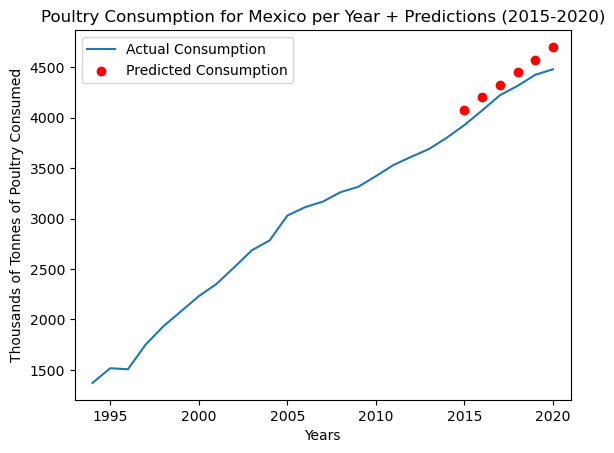

In [238]:
full_df = pd.concat([poultry_df, filtered_poultry_df])

# plotting the full df and the scatter predictions
plt.plot(full_df["TIME"], full_df["Value"], label="Actual Consumption")
plt.scatter([i for i in range(2015,2021)], y_pred, color="red", label="Predicted Consumption")

# set xlim to display years correctly
plt.xlim(1993, 2021)
plt.xlabel("Years")
plt.ylabel("Thousands of Tonnes of Poultry Consumed")
plt.title("Poultry Consumption for Mexico per Year + Predictions (2015-2020)")

plt.legend()
plt.show()

The predicted consumption was a linear regression model based off the past 20 years for 2015-2020. The predicted regression was above the actual consumption for all 5 years, and we can see that the actual consumption did trail off a bit by the end. Overall the regression model was fairly accurate and did predict a positive correlation, but there was a minor dip, likely due to extraneous circumstances such as the pandemic.

In [226]:
print(f"The intercept is {round(lr.intercept_[0], 2)}.")
print(f"The slope is {round(lr.coef_[0,0], 2)}.")

The intercept is -248317.89.
The slope is 125.26.


The slope represents the average increase in thousand tonnes of poultry consumed for each year that passes, and the y-intercept is the starting poultry consumption. Obviously, it can't be negative so this should not be applied 1-to-1 to the real world, but a mathematical representation for the slope.

## Question 7: 
(5 pts) Calculate the R-squared and explain what this tells you about the model.

In [224]:
y_true = [y for y in filtered_poultry_df["Value"]]
r2 = r2_score(y_true, y_pred)

print(f"The R-squared score is: {round(r2,2)}.")

The R-squared score is: 0.38.


This R-squared score is above 0, indicating a positive correlation. Since the r-sqaured value is not above 0.7, it wouldn't be considered a major positive correlation, but just a slightly positive one. It supports the real predictions of the consumption of poultry increasing over time, but predicted a little more.

## Question 8: 
(5 pts)[optional/bonus] This is a challenge question that may require some research.
residuals: Visualize the residuals of the regression model in question 6 and explain the chart.
Note: A residual is the difference between the actual and predicted values.

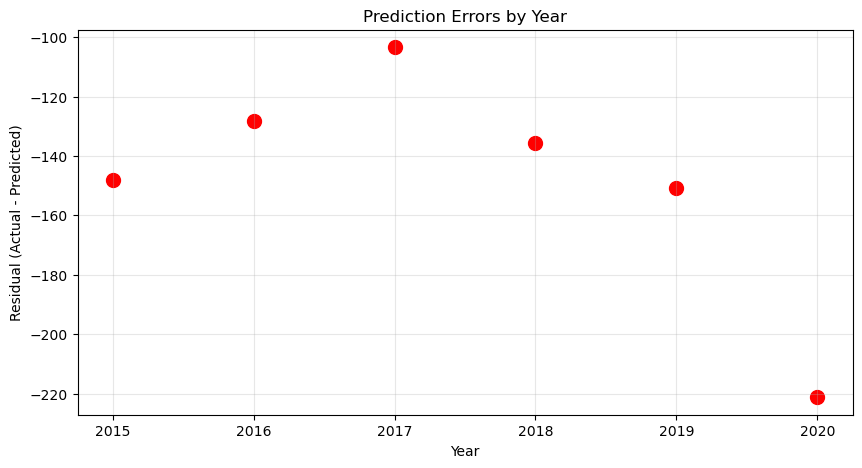

In [260]:
# residuals are simply the difference between y_predictions and the real results
residuals = [x - y for x, y in zip(y_true, y_pred)]

# residual plot
plt.figure(figsize=(10, 5))
plt.scatter(range(2015, 2021), residuals, color='red', s=100)
plt.xlabel('Year')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Prediction Errors by Year')
plt.grid(True, alpha=0.3)
plt.show()

As stated before, residuals are literally just the difference between expected and predicted values. As demonstrated in the graph, the highest prediction error was in 2020, where close to the predictions were 220 thousand tonnes more than expected. All residuals are negative, confirming that all predictions were above the actual. 2017 was the closest year however, only around a 100 over on predictions.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
